In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0202/ses-0001/sub-strokecase0202_ses-0001_snp.png
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0202/ses-0001/sub-strokecase0202_ses-0001_msk.nii
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0242/ses-0001/sub-strokecase0242_ses-0001_snp.png
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0242/ses-0001/sub-strokecase0242_ses-0001_msk.nii
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0219/ses-0001/sub-strokecase0219_ses-0001_msk.nii
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0219/ses-0001/sub-strokecase0219_ses-0001_snp.png
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0231/ses-0001/sub-strokecase0231_ses-0001_msk.nii
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0231/ses-0001/sub-strokecase0231_ses-0001_snp.png
/kaggle/input/isles22/ISLES2022/derivatives/sub-strokecase0112/ses-0001/sub-strokecase0112_ses-0001_snp.png
/kaggle/input/isles22/ISLES2

In [2]:
#imports
import nibabel as nib
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

In [3]:
import tensorflow as tf

#import keras.backend as K
import tensorflow.keras.backend as K
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
#from keras.layers.core import Lambda, RepeatVector, Reshape
#from keras.layers.convolutional import Conv2D, Conv2DTranspose
#from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import concatenate
#from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import CSVLogger
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
#from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import models, layers, regularizers

#from focal_loss import BinaryFocalLoss

2025-06-25 09:51:34.515008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750845094.728425      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750845094.788302      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
TRAIN_DATASET_PATH = '/kaggle/input/isles22/ISLES2022/rawdata'
train_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]
#print(train_directories)

train_ids = []
for i in range(len(train_directories)):
    train_ids.append(train_directories[i][40:58])
print(len(train_ids))
train_ids = sorted(train_ids)
train_ids

250


['sub-strokecase0001',
 'sub-strokecase0002',
 'sub-strokecase0003',
 'sub-strokecase0004',
 'sub-strokecase0005',
 'sub-strokecase0006',
 'sub-strokecase0007',
 'sub-strokecase0008',
 'sub-strokecase0009',
 'sub-strokecase0010',
 'sub-strokecase0011',
 'sub-strokecase0012',
 'sub-strokecase0013',
 'sub-strokecase0014',
 'sub-strokecase0015',
 'sub-strokecase0016',
 'sub-strokecase0017',
 'sub-strokecase0018',
 'sub-strokecase0019',
 'sub-strokecase0020',
 'sub-strokecase0021',
 'sub-strokecase0022',
 'sub-strokecase0023',
 'sub-strokecase0024',
 'sub-strokecase0025',
 'sub-strokecase0026',
 'sub-strokecase0027',
 'sub-strokecase0028',
 'sub-strokecase0029',
 'sub-strokecase0030',
 'sub-strokecase0031',
 'sub-strokecase0032',
 'sub-strokecase0033',
 'sub-strokecase0034',
 'sub-strokecase0035',
 'sub-strokecase0036',
 'sub-strokecase0037',
 'sub-strokecase0038',
 'sub-strokecase0039',
 'sub-strokecase0040',
 'sub-strokecase0041',
 'sub-strokecase0042',
 'sub-strokecase0043',
 'sub-strok

In [5]:
TRAINMask_DATASET_PATH = '/kaggle/input/isles22/ISLES2022/derivatives'
mask_directories = [f.path for f in os.scandir(TRAINMask_DATASET_PATH) if f.is_dir()]


mask_ids = []
for i in range(len(mask_directories)):
    mask_ids.append(mask_directories[i][44:62])
print(len(mask_ids))
mask_ids = sorted(mask_ids)
mask_ids

250


['sub-strokecase0001',
 'sub-strokecase0002',
 'sub-strokecase0003',
 'sub-strokecase0004',
 'sub-strokecase0005',
 'sub-strokecase0006',
 'sub-strokecase0007',
 'sub-strokecase0008',
 'sub-strokecase0009',
 'sub-strokecase0010',
 'sub-strokecase0011',
 'sub-strokecase0012',
 'sub-strokecase0013',
 'sub-strokecase0014',
 'sub-strokecase0015',
 'sub-strokecase0016',
 'sub-strokecase0017',
 'sub-strokecase0018',
 'sub-strokecase0019',
 'sub-strokecase0020',
 'sub-strokecase0021',
 'sub-strokecase0022',
 'sub-strokecase0023',
 'sub-strokecase0024',
 'sub-strokecase0025',
 'sub-strokecase0026',
 'sub-strokecase0027',
 'sub-strokecase0028',
 'sub-strokecase0029',
 'sub-strokecase0030',
 'sub-strokecase0031',
 'sub-strokecase0032',
 'sub-strokecase0033',
 'sub-strokecase0034',
 'sub-strokecase0035',
 'sub-strokecase0036',
 'sub-strokecase0037',
 'sub-strokecase0038',
 'sub-strokecase0039',
 'sub-strokecase0040',
 'sub-strokecase0041',
 'sub-strokecase0042',
 'sub-strokecase0043',
 'sub-strok

In [6]:
from sklearn.model_selection import train_test_split
train_val_ids, test_ids,train_val_mask, test_mask = train_test_split(train_ids,mask_ids,test_size=0.20,random_state=42) 
train_ids,  val_ids, train_mask , val_mask = train_test_split(train_val_ids,train_val_mask,test_size=0.20,random_state=42)
len(train_ids)

160

In [7]:
print('trainingId:',len(train_ids))
print('val_Id:',len(val_ids))
print('Test_Id:',len(test_ids))

trainingId: 160
val_Id: 40
Test_Id: 50


In [8]:
len(test_ids)
test_ids

['sub-strokecase0143',
 'sub-strokecase0007',
 'sub-strokecase0098',
 'sub-strokecase0061',
 'sub-strokecase0113',
 'sub-strokecase0182',
 'sub-strokecase0198',
 'sub-strokecase0185',
 'sub-strokecase0010',
 'sub-strokecase0105',
 'sub-strokecase0201',
 'sub-strokecase0217',
 'sub-strokecase0237',
 'sub-strokecase0241',
 'sub-strokecase0068',
 'sub-strokecase0225',
 'sub-strokecase0195',
 'sub-strokecase0016',
 'sub-strokecase0178',
 'sub-strokecase0025',
 'sub-strokecase0248',
 'sub-strokecase0020',
 'sub-strokecase0115',
 'sub-strokecase0069',
 'sub-strokecase0177',
 'sub-strokecase0046',
 'sub-strokecase0056',
 'sub-strokecase0011',
 'sub-strokecase0031',
 'sub-strokecase0121',
 'sub-strokecase0202',
 'sub-strokecase0034',
 'sub-strokecase0142',
 'sub-strokecase0220',
 'sub-strokecase0026',
 'sub-strokecase0112',
 'sub-strokecase0019',
 'sub-strokecase0197',
 'sub-strokecase0181',
 'sub-strokecase0160',
 'sub-strokecase0119',
 'sub-strokecase0097',
 'sub-strokecase0109',
 'sub-strok

In [9]:
# defining the performance metrics
def dice_coeff(y_true,y_pred):
    y_true_new = K.flatten(y_true)
    y_pred_new = K.flatten(y_pred)
    denominator = K.sum(y_true_new) + K.sum(y_pred_new)
    #if denominator == 0:
        #return 1.0
    numerator = K.sum(y_true_new * y_pred_new)
    return (2*numerator+0.1)/(denominator+0.1)

def dice_loss(y_true,y_pred):
    return 1 - dice_coeff(y_true,y_pred)

def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def dsc(y_true, y_pred):
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    tp = K.sum(y_true * y_pred)
    fn = K.sum(y_true * neg_y_pred)
    fp = K.sum(neg_y_true * y_pred)
    dsc = (2*tp) / ((2*tp) + fn + fp)
    return dsc    

def iou(y_true,y_pred):
    intersec = K.sum(y_true * y_pred)
    union = K.sum(y_true + y_pred)
    iou = (intersec + 0.1) / (union- intersec + 0.1)
    return iou

def dice_score(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2.0 * intersection + 1e-5) / (union + 1e-5)
    return dice

def dice_loss(y_true, y_pred):
    return 1.0 -dice_score(y_true, y_pred)

In [22]:
#import glob
#VOLUME_SLICES = 20
#VOLUME_START_AT = 5
IMG_SIZE=112

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 1, shuffle=True):
       
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        Batch_ids = [self.list_IDs[k] for k in indexes]

        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        #X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        #y = np.zeros((self.batch_size*VOLUME_SLICES, 112, 112))
        #Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim))
        # Generate data
        #def find_files_in_subfolders(TRAIN_DATASET_PATH, batch_ids):  
            #matching_files = []
        for c, i in enumerate(Batch_ids): 
            #print('i=',i)
            case_path = os.path.join(TRAIN_DATASET_PATH, i)
            #print('case_path',case_path)
            session_path = os.path.join(case_path, 'ses-0001')
            folder_name = f'{i}_ses-0001_dwi.nii'
            folder_path = os.path.join(session_path, folder_name)
            #print('folder_path=',folder_path)

            if os.path.isdir(folder_path):
                for filename in os.listdir(folder_path):
                    #print('filename=',filename)
                    if filename.endswith('.nii'):
                        global file_path
                        file_path = os.path.join(folder_path, filename)
                        #print(file_path)

            dwi = nib.load(file_path).get_fdata()
            #print("dwi",dwi.shape)
            #dwi=dwi.astype(np.uint8)
            dwi=scaler.fit_transform(dwi.reshape(-1, dwi.shape[-1])).reshape(dwi.shape)
            slices = dwi.shape[2]
            X = np.zeros((slices, 112,112, 1))

            case_path2 = os.path.join(TRAINMask_DATASET_PATH, i)
            data_path_2 = os.path.join(case_path2 +'/ses-0001', f'{i}_ses-0001_msk.nii');
            #print(data_path_2)
            msk = nib.load(data_path_2).get_fdata()
            #print("mask",msk.shape)
            #msk=msk.astype(np.uint8)
            msk_slices = msk.shape[2]
            y = np.zeros((msk_slices, 112,112,1))
            #print('y=',y.shape)
            #y=y.astype(np.float32)  
            
            for j in range(slices):
                X[j,:,:,0] = cv2.resize(dwi[:,:,j+0], (IMG_SIZE, IMG_SIZE));
                X=X.astype(np.float32)
            #X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
            #for l in range(msk_slices):
                y[j,:,:,0] = cv2.resize(msk[:,:,j+0],(IMG_SIZE,IMG_SIZE));
                y=y.astype(np.float32) 
                threshold = 0.1  # Adjust this threshold as needed
                binary_mask = np.where(y >= threshold, 1, 0).astype(np.float32)
       
        #mask = tf.one_hot(y, depth = 1)
        #print(X.shape)
        #print(y.shape)
        #print(binary_mask.shape)
        #print(binary_mask.dtype)
        #print(X.max())
        
        #return X/np.max(X), mask
        return X, binary_mask
        
training_generator = DataGenerator(train_ids)
val_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)
        

In [23]:
print("train_ids=", len(training_generator))
training_generator[0]

train_ids= 160


(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [15]:
import tensorflow as tf

from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Input, BatchNormalization, Activation

def unet_block(input_tensor, num_filters):
    x = Conv2D(num_filters, (3, 3), padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def attention_block(l_layer,h_layer): #Attention Block
    phi=Conv2D(h_layer.shape[-1],(1,1),padding='same')(l_layer)
    theta=Conv2D(h_layer.shape[-1],(1,1),strides=(2,2),padding='same')(h_layer)
    x=tf.keras.layers.add([phi,theta])
    x=Activation('relu')(x)
    x=Conv2D(1,(1,1),padding='same',activation='sigmoid')(x)
    x=UpSampling2D(size=(2,2))(x)
    x=tf.keras.layers.multiply([h_layer,x])
    x=BatchNormalization(axis=3)(x)
    return x

def Attention_UNet(input_shape=(112, 112, 1), num_classes=1):
    inputs = Input(input_shape)
    features = 16

    # Encoder
    enc1 = unet_block(inputs, features)
    pool1 = MaxPooling2D(pool_size=(2, 2))(enc1)
    
    enc2 = unet_block(pool1, features * 2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(enc2)
    
    enc3 = unet_block(pool2, features * 4)
    pool3 = MaxPooling2D(pool_size=(2, 2))(enc3)
    
    enc4 = unet_block(pool3, features * 8)
    pool4 = MaxPooling2D(pool_size=(2, 2))(enc4)

    # Bottleneck
    bottleneck = unet_block(pool4, features * 16)

    # Decoder
    upconv4 = Conv2DTranspose(features * 8, (2, 2), strides=(2, 2), padding="same")(bottleneck)
    #dec4=attention_block(bottleneck,enc4) #Attention Gate
    dec4 = concatenate([upconv4, enc4])
    dec4 = unet_block(dec4, features * 8)
    
    upconv3 = Conv2DTranspose(features * 4, (2, 2), strides=(2, 2), padding="same")(dec4)#(enc4)#(dec4)
    #dec3 = attention_block(dec4,enc3)
    dec3 = concatenate([upconv3, enc3])
    dec3 = unet_block(dec3, features * 4)
    
    upconv2 = Conv2DTranspose(features * 2, (2, 2), strides=(2, 2), padding="same")(dec3)
    #dec2 = attention_block(dec3,enc2) #Attention Gate
    dec2 = concatenate([upconv2, enc2]) 
    dec2 = unet_block(dec2, features * 2)
    
    upconv1 = Conv2DTranspose(features, (2, 2), strides=(2, 2), padding="same")(dec2)
    #dec1 = attention_block(dec2,enc1) #Attention Gate
    dec1 = concatenate([upconv1, enc1])
    dec1 = unet_block(dec1, features)

    outputs = Conv2D(num_classes, (1, 1), activation="sigmoid")(dec1)

    return Model(inputs, outputs)

# Create the model
model = Attention_UNet(input_shape=(112, 112, 1), num_classes=1)
model.summary()


I0000 00:00:1750845945.081494      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750845945.082178      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 112, 112, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 16)   │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 112, 112, 16)   │          2,320 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 112, 112, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 112, 112, 16)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 16)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 32)     │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 32)     │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 32)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 32)     │          9,248 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 32)     │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 56, 56, 32)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 28, 28, 32)     │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 1,946,705 (7.43 MB)

 Trainable params: 1,943,761 (7.41 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [24]:
model.compile(loss=dice_loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',dice_coeff,iou] )


In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
wt_path = '/kaggle/output/attentionUnet.model.keras'
checkpoint = ModelCheckpoint(filepath = wt_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
att_unet_history = model.fit(training_generator, 
                    #steps_per_epoch=len(train_ids),
                    validation_data=val_generator, 
                    callbacks= [checkpoint],
                    epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.9675 - dice_coeff: 0.0593 - iou: 0.0325 - loss: 0.9434

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.94385, saving model to /kaggle/output/attentionUnet.model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 116s 577ms/step - accuracy: 0.9675 - dice_coeff: 0.0594 - iou: 0.0325 - loss: 0.9433 - val_accuracy: 0.9441 - val_dice_coeff: 0.0584 - val_iou: 0.0317 - val_loss: 0.9439
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9853 - dice_coeff: 0.1323 - iou: 0.0797 - loss: 0.8786
Epoch 2: val_loss improved from 0.94385 to 0.81862, saving model to /kaggle/output/attentionUnet.model.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 45s 280ms/step - accuracy: 0.9853 - dice_coeff: 0.1325 - iou: 0.0799 - loss: 0.8784 - val_accuracy: 0.9969 - val_dice_coeff: 0.2030 - val_iou: 0.1270 - val_loss: 0.8186
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9968 - dice_coeff: 0.3202 - iou: 0.2144 - loss: 0.7087
Epoch 3: val_loss did not improve from 0.81862
160/160 ━━━━━━━━━━━━━━━━━━━━ 45s 278ms/step - accuracy: 0.9968 - dice_coeff: 0.3202 - iou: 0.21

In [26]:
test_pred=model.predict(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 525ms/step


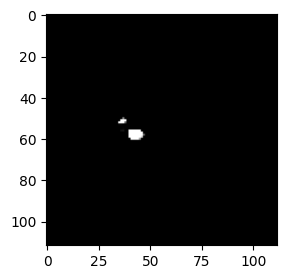

In [32]:
fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.imshow(test_pred[15,:,:,:],cmap='gray')

In [29]:
results = model.evaluate(test_generator, steps=len(test_ids))
print("Test loss: ",results[0])
print("Test Dice: ",results[2])

50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9988 - dice_coeff: 0.6117 - iou: 0.4821 - loss: 0.3895
Test loss:  0.4287611246109009
Test Dice:  0.5727407336235046


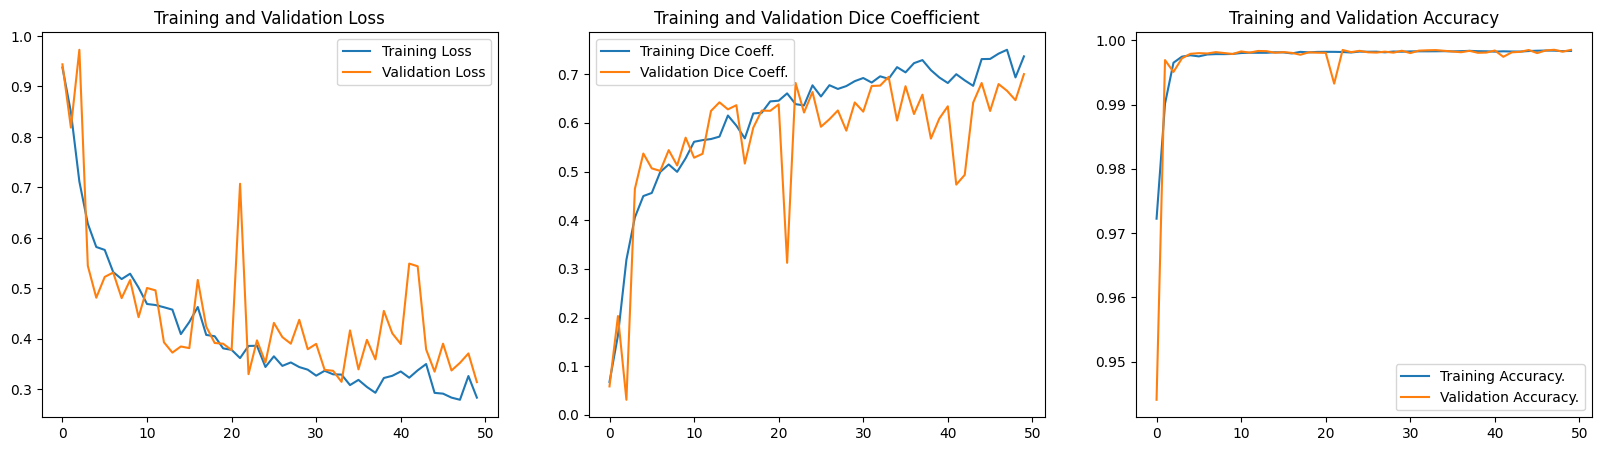

In [31]:
loss = att_unet_history.history['loss']
val_loss = att_unet_history.history['val_loss']

dice = att_unet_history.history['dice_coeff']
val_dice = att_unet_history.history['val_dice_coeff']

acc = att_unet_history.history['accuracy']
val_acc = att_unet_history.history['val_accuracy']

epochs_range = range(50)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 2)
plt.plot(epochs_range, dice, label='Training Dice Coeff.')
plt.plot(epochs_range, val_dice, label='Validation Dice Coeff.')
plt.legend(loc='best')
plt.title('Training and Validation Dice Coefficient')

plt.subplot(1, 3, 3)
plt.plot(epochs_range, acc, label='Training Accuracy.')
plt.plot(epochs_range, val_acc, label='Validation Accuracy.')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.show()